In [6]:
# objective
# 환경오염 데이터를 이용한 도시들의 패턴 식별
# target
# 환경 정책 수립자-환경오염에 대한 대응책을 수립하는 정책 수립자, 일반 시민-환경오염에 대한 관심이 많은 일반 시민

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# df = pd.read_csv('./data/south-korean-pollution-data.csv')
df = pd.read_csv('./data/pollution_data_before.csv', encoding='cp949')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

########## Simple Data Exploration 1 ##########
# Set pandas options to display all rows and columns
print("=========Dtype of all columns=========")
print(df.dtypes)
print("=========Involving Nan=========")
print(df.isna().sum())
# drop nan
df = df.dropna()

print("=========Involving Nan=========")
print(df.isna().sum())

print("========= Statistical Description =========") 
print(df.describe())




=========Dtype of all columns=========
Column1       int64
Country      object
District     object
City         object
date        float64
pm25         object
pm10         object
so2          object
o3           object
no2          object
co           object
dtype: object
=========Involving Nan=========
Column1      0
Country      0
District     0
City         0
date         0
pm25        95
pm10        95
so2          0
o3          95
no2         95
co          95
dtype: int64
=========Involving Nan=========
Column1     0
Country     0
District    0
City        0
date        0
pm25        0
pm10        0
so2         0
o3          0
no2         0
co          0
dtype: int64
========= Statistical Description =========
            Column1          date
count  15390.000000  15390.000000
mean    7695.672840   2018.527579
std     4444.872987      2.274285
min        0.000000   2015.010000
25%     3847.250000   2016.120000
50%     7694.500000   2018.120000
75%    11541.750000   2020.120000
ma

In [9]:
########## Simple Data Exploration 2: 각 도시별 오염지수 평균 출력 ##########
# Everything here is before scaling
print("\n========= Mean values of pollutants for each city =========")
# Set pandas options to display all rows and columns

pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# # drop nan values and string values
# df = df.dropna()
# df = df.drop(df[df['pm25'] == '-'].index, axis=0)
# df = df.drop(df[df['pm10'] == '-'].index, axis=0)
# df = df.drop(df[df['o3'] == '-'].index, axis=0)
# df = df.drop(df[df['no2'] == '-'].index, axis=0)
# df = df.drop(df[df['so2'] == '-'].index, axis=0)
# df = df.drop(df[df['co'] == '-'].index, axis=0)

# # convert num* to num and num** to num
# df['pm25'] = df['pm25'].str.replace("*", "")
# df['pm25'] = df['pm25'].str.replace("**", "")
# df['pm10'] = df['pm10'].str.replace("*", "")
# df['pm10'] = df['pm10'].str.replace("**", "")
# df['o3'] = df['o3'].str.replace("*", "")
# df['o3'] = df['o3'].str.replace("**", "")
# df['no2'] = df['no2'].str.replace("*", "")
# df['no2'] = df['no2'].str.replace("**", "")
# df['so2'] = df['so2'].str.replace("*", "")
# df['so2'] = df['so2'].str.replace("**", "")
# df['co'] = df['co'].str.replace("*", "")
# df['co'] = df['co'].str.replace("**", "")


# convert the pollutants columns to float
df[pollutants] = df[pollutants].astype(float)

print("=========Involving Nan=========")
print(df.isna().sum())

print("========= Statistical Description =========") 
print(df.describe())


print("=========Dtype of all columns=========")
print(df.dtypes)

# Before Scaling, compute the mean of poollutants for each city
city_pollutants_mean = df.groupby('City')[pollutants].mean()
print(city_pollutants_mean)

# save the mean values of pollutants for each city
city_pollutants_mean.to_csv('./data/city_pollutants_mean.csv', encoding='utf-8')

# 각 오염 물질에 대해 도시를 내림차순으로 정렬
city_ranking = {}
for pollutant in pollutants:
    city_ranking[pollutant] = city_pollutants_mean[pollutant].sort_values(ascending=False).index

city_ranking_df = pd.DataFrame(city_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(city_ranking_df)


========= Mean values of pollutants for each city =========
=========Involving Nan=========
Column1     0
Country     0
District    0
City        0
date        0
pm25        0
pm10        0
so2         0
o3          0
no2         0
co          0
dtype: int64
========= Statistical Description =========
            Column1          date          pm25          pm10           so2   
count  10658.000000  10658.000000  10658.000000  10658.000000  10658.000000  \
mean    7680.198067   2019.453982     20.616720     37.272847      0.003249   
std     4500.919237      1.973597      8.461845     13.923363      0.001263   
min        0.000000   2015.010000      0.000000      0.000000      0.001000   
25%     3672.250000   2018.060000     14.000000     27.000000      0.002000   
50%     7678.500000   2020.020000     19.000000     36.000000      0.003000   
75%    11665.750000   2021.070000     26.000000     45.000000      0.004000   
max    15484.000000   2022.110000     57.000000    109.000000   

In [4]:
########## Simple Data Exploration 2: 각 '도(행정구역)'별 오염지수 평균 출력 ##########
print("\n========= Mean values of pollutants for each district =========")

# Before Scaling, compute the mean of poollutants for each 행정구역
district_pollutants_mean = df.groupby('District')[pollutants].mean()
print(district_pollutants_mean)

# 각 오염 물질에 대해 행정구역 내림차순으로 정렬
district_ranking = {}
for pollutant in pollutants:
    district_ranking[pollutant] = district_pollutants_mean[pollutant].sort_values(ascending=False).index

district_ranking_df = pd.DataFrame(district_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(district_ranking_df)


========= Mean values of pollutants for each district =========
               pm25       pm10        o3       no2       so2        co
District                                                              
강원도       10.816301  40.249175  0.026717  0.015262  0.003497  0.498253
경기도       12.361861  51.131531  0.024172  0.027475  0.004703  0.538036
경상남도      10.906151  40.631803  0.029288  0.018203  0.004152  0.433149
경상북도       8.479339  40.431182  0.026885  0.014316  0.004420  0.467428
광주광역시     12.688131  40.363636  0.028098  0.018538  0.003242  0.490152
대구광역시     12.622475  43.106061  0.026121  0.021341  0.003720  0.449242
대전광역시     12.187500  41.924242  0.025348  0.019765  0.003242  0.459091
부산광역시     12.852273  43.439394  0.029008  0.019826  0.005652  0.384091
서울특별시     13.147727  43.772727  0.022924  0.030606  0.004803  0.525758
세종특별자치시   13.861111  26.781250  0.017792  0.012062  0.002021  0.338542
울산광역시     12.285985  43.106061  0.027856  0.021803  0.006712  0.506818
인천광역시     13

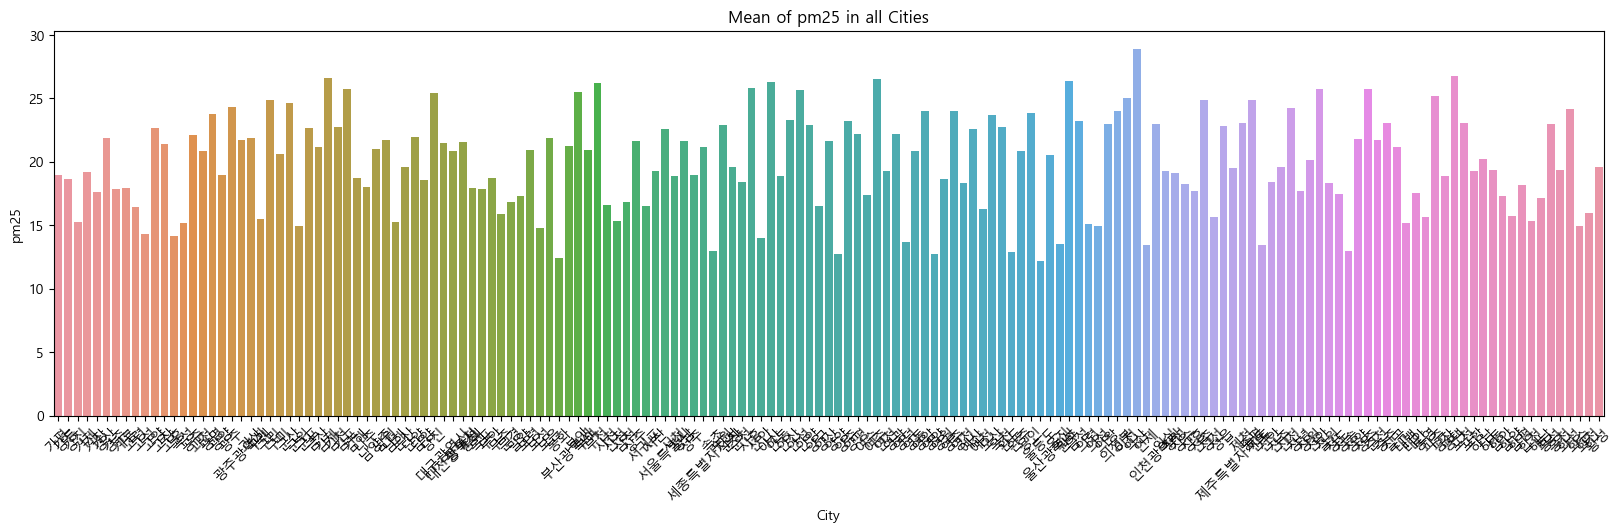

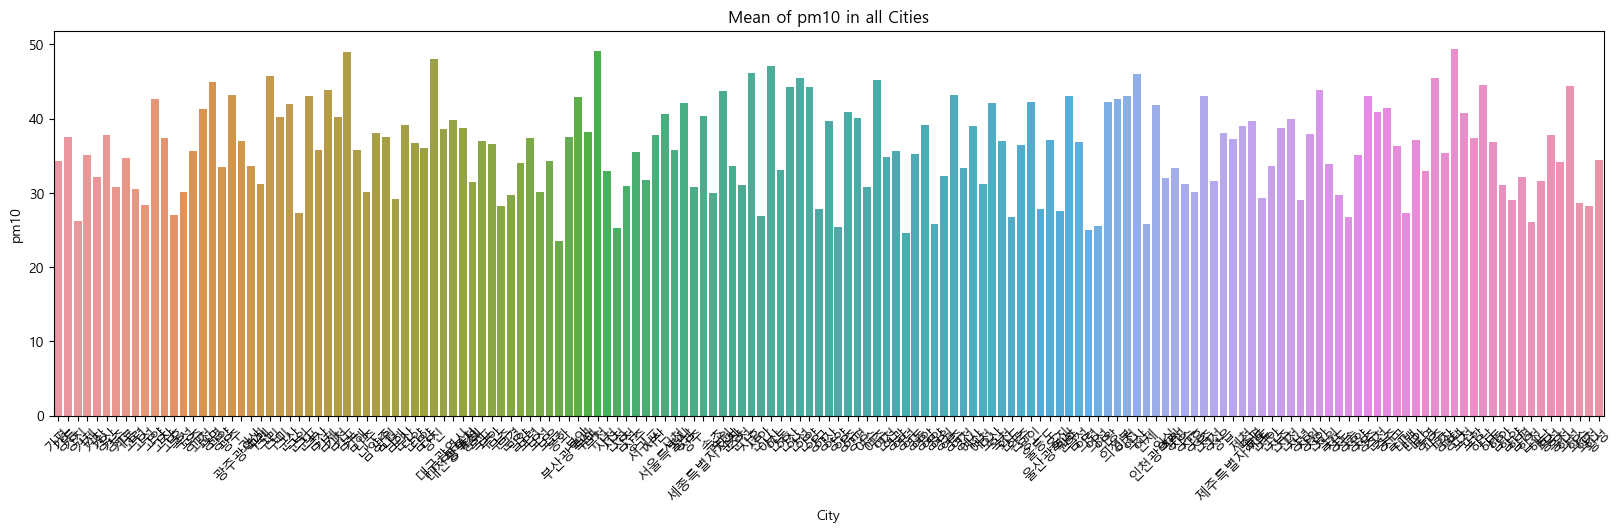

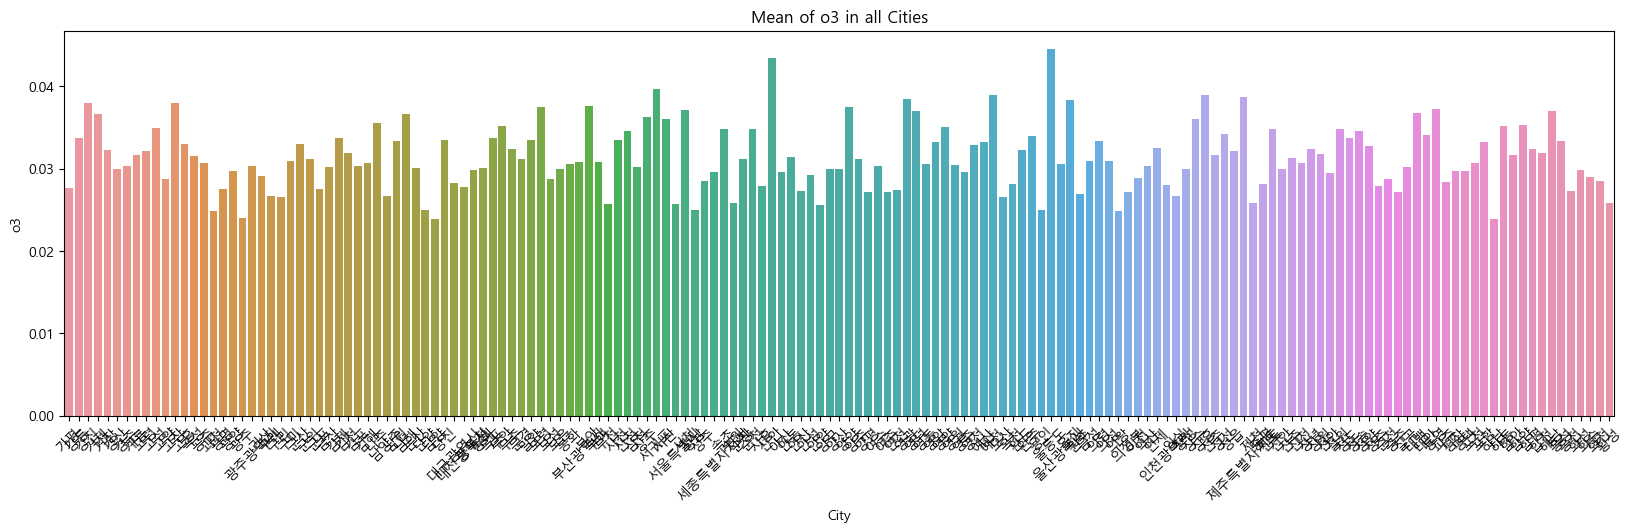

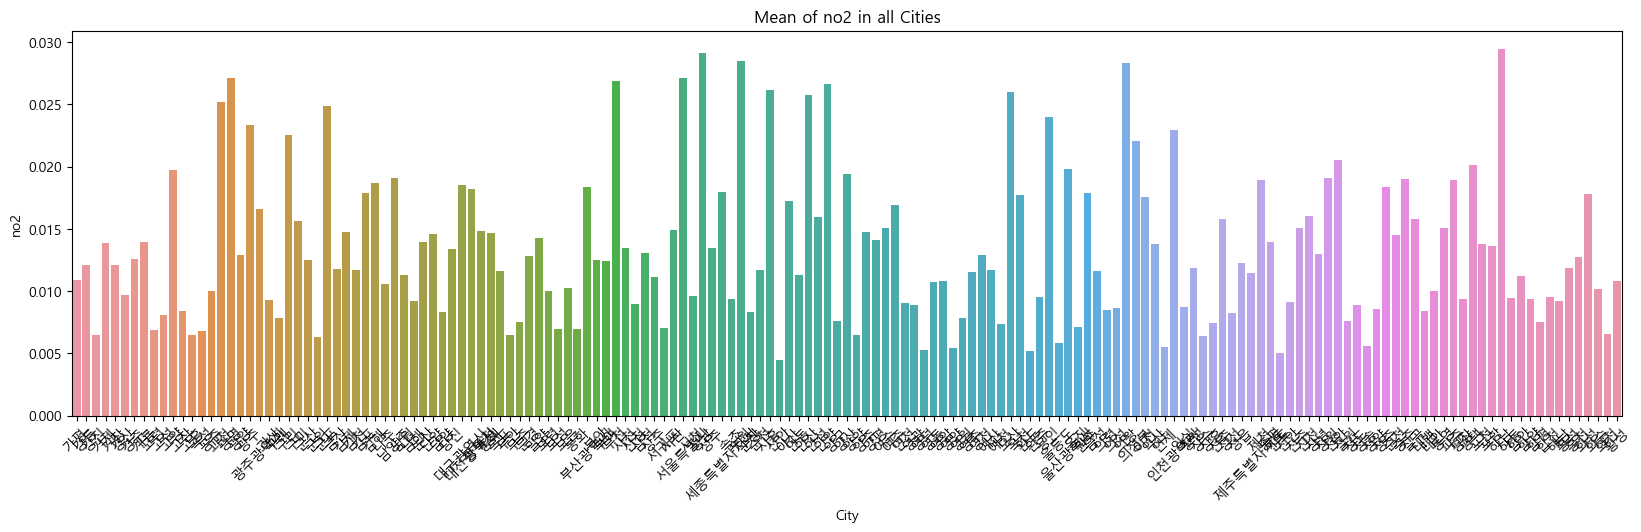

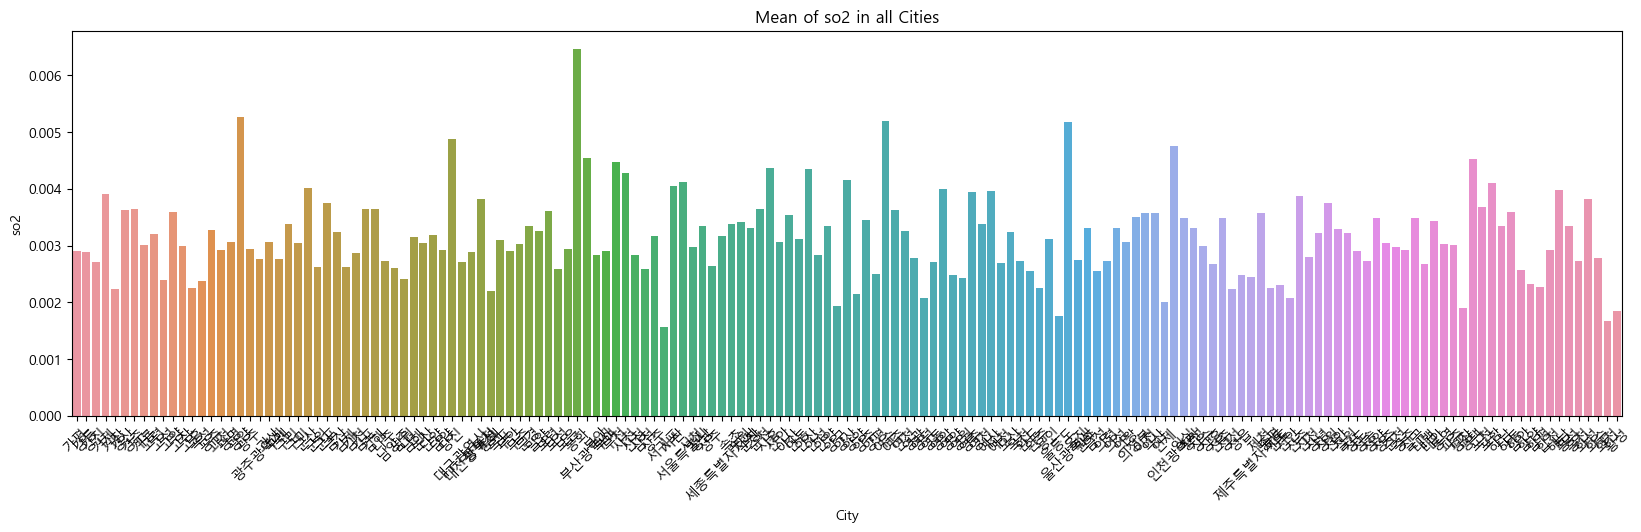

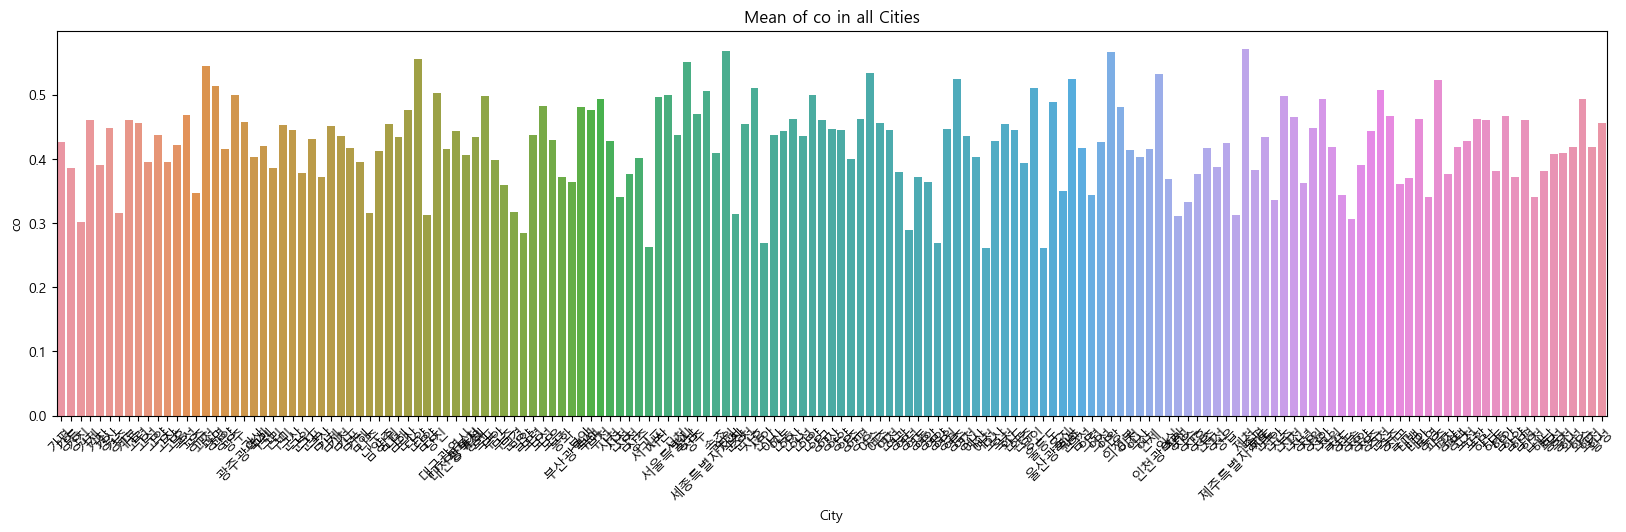


========= Variance of pollutants =========
========= (Higher variance means more spread out data) =========
pm25     71.602824
pm10    193.860051
o3        0.000108
no2       0.000063
so2       0.000002
co        0.017133
dtype: float64


In [10]:
########## Simple Data Exploration 3: Plots-1 ##########
# 각 도시의 오염 물질별 평균 구하기
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=city_pollutants_mean.index, y=pollutant, data=city_pollutants_mean)
    plt.title(f'Mean of {pollutant} in all Cities')
    plt.xticks(rotation=45)
    plt.show()

# calculcate variance of each pollutant
print("\n========= Variance of pollutants ========="
        "\n========= (Higher variance means more spread out data) =========")
print(df[pollutants].var())




C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


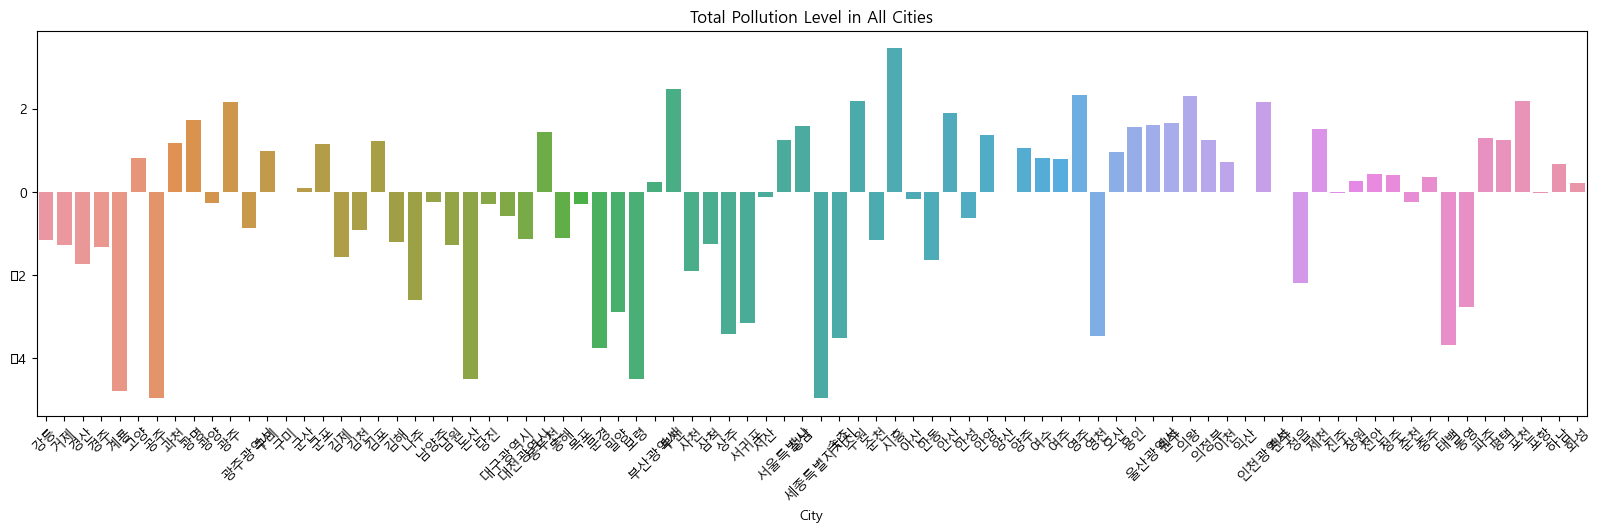

In [6]:
########## Simple Data Exploration 3: Plot-2 ##########
# Scaling with minmax
# scaler = MinMaxScaler()
# df[pollutants] = scaler.fit_transform(df[pollutants])




from sklearn.preprocessing import StandardScaler
# Scaling with standard scaler

scaler = StandardScaler()
# df[pollutants] = scaler.fit_transform(df[pollutants])
# Standardize the data
data_std = scaler.fit_transform(df[pollutants])
data_std = pd.DataFrame(data_std, columns=pollutants)
data_std['City'] = df['City']
data_std['District'] = df['District']

# 각 도시의 오염 물질의 스케일링된 값 합산 후 평균 구하기
city_total_means = data_std.groupby('City')[pollutants].mean().sum(axis=1)
# plot 2
plt.figure(figsize=(20, 5))
sns.barplot(x=city_total_means.index, y=city_total_means.values)
plt.title('Total Pollution Level in All Cities')
plt.xticks(rotation=45)
plt.show()

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


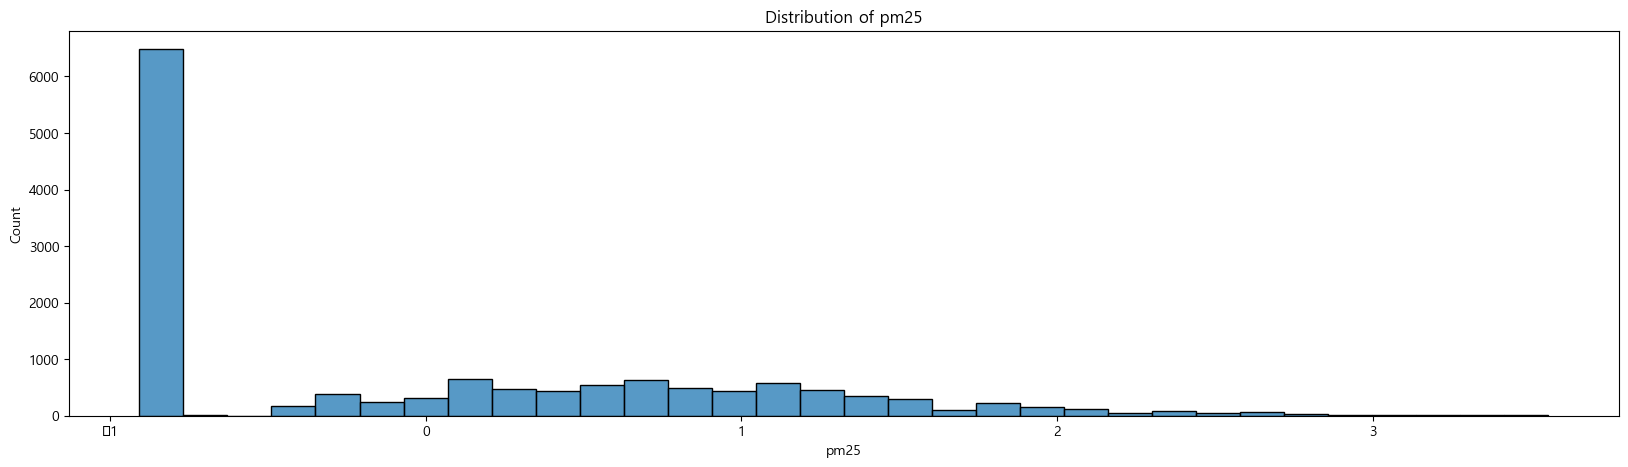

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


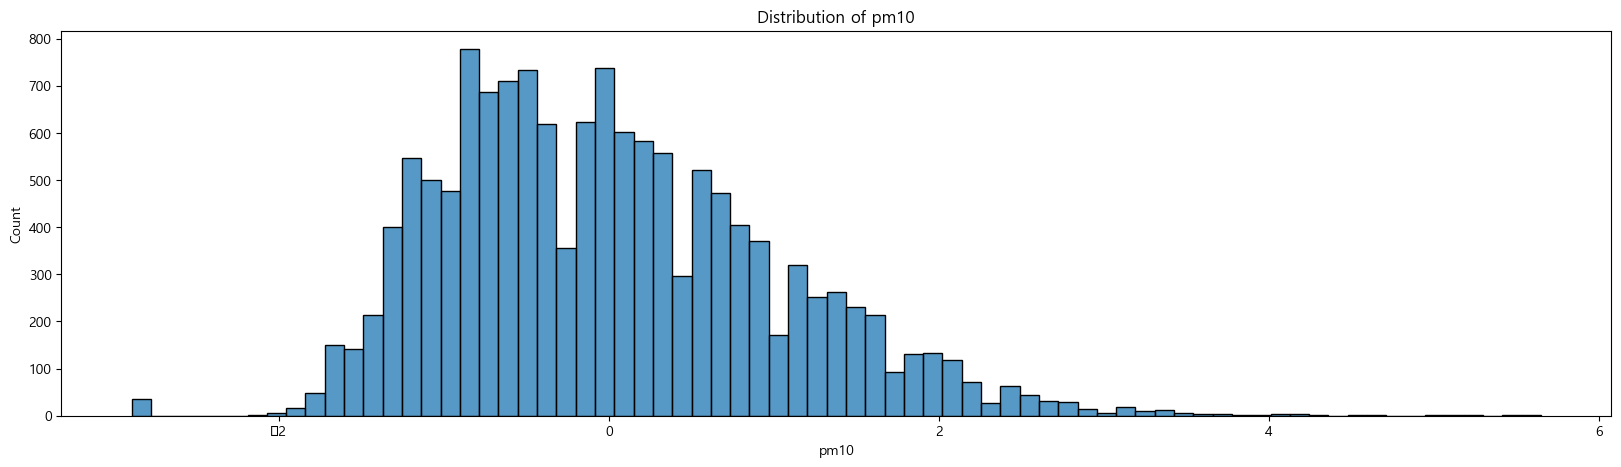

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


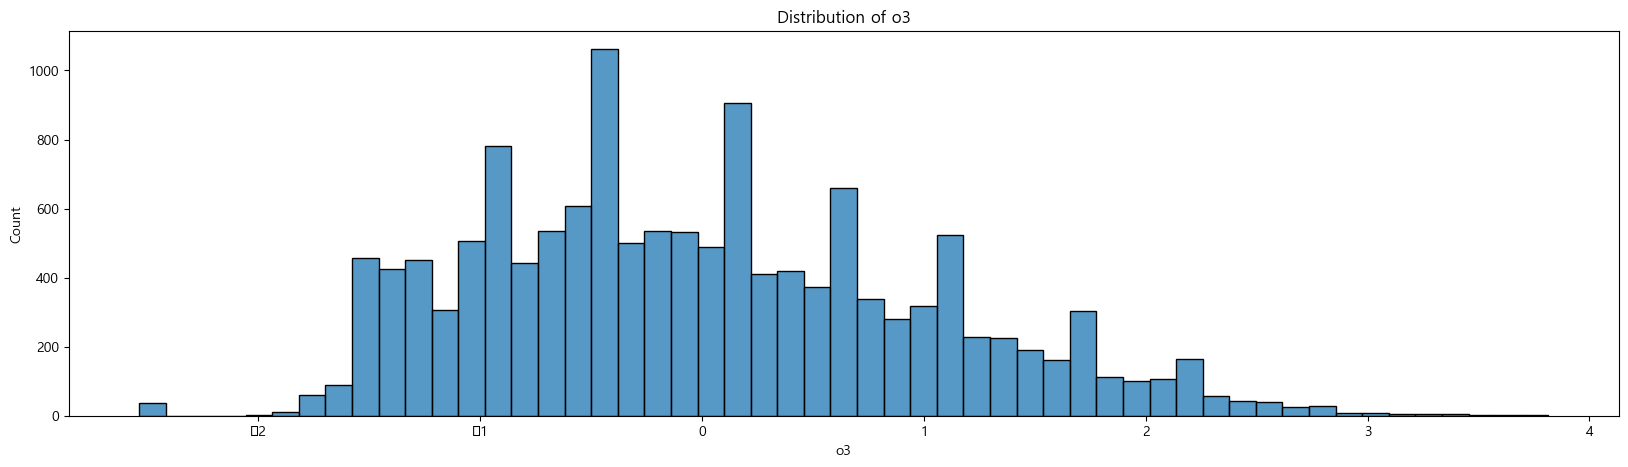

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


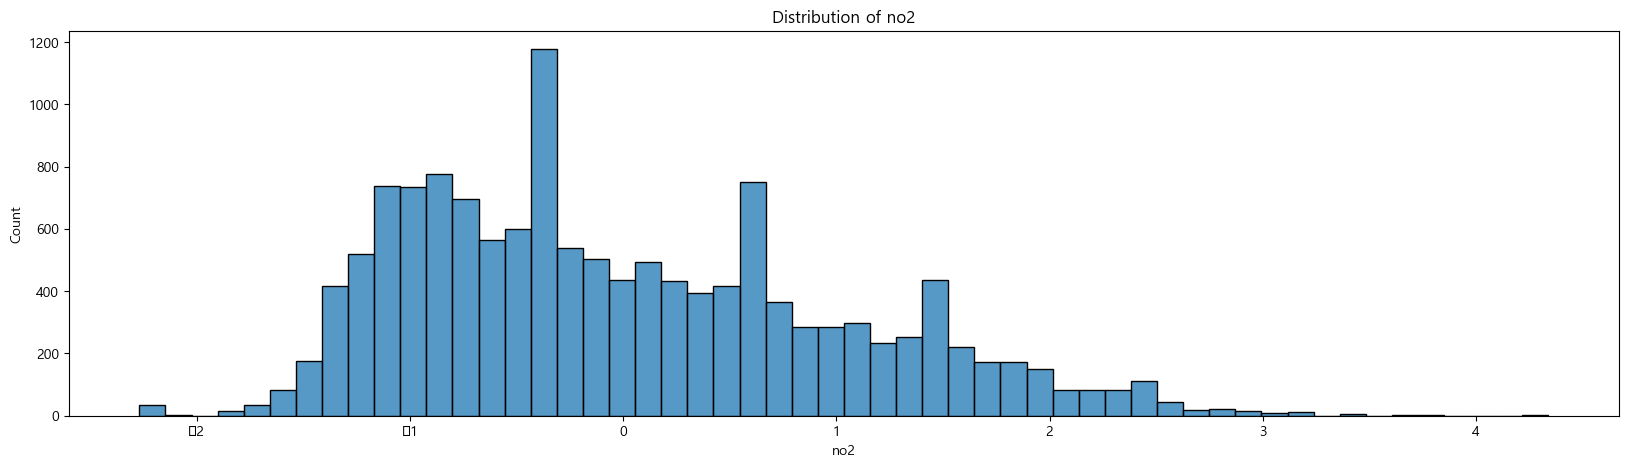

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


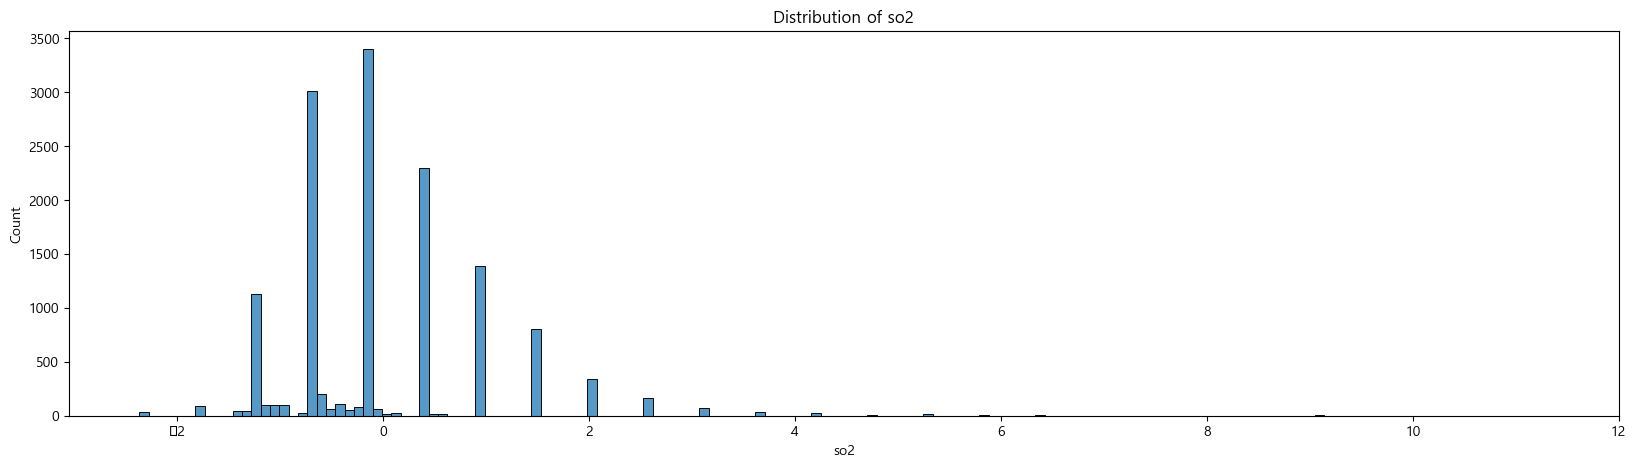

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


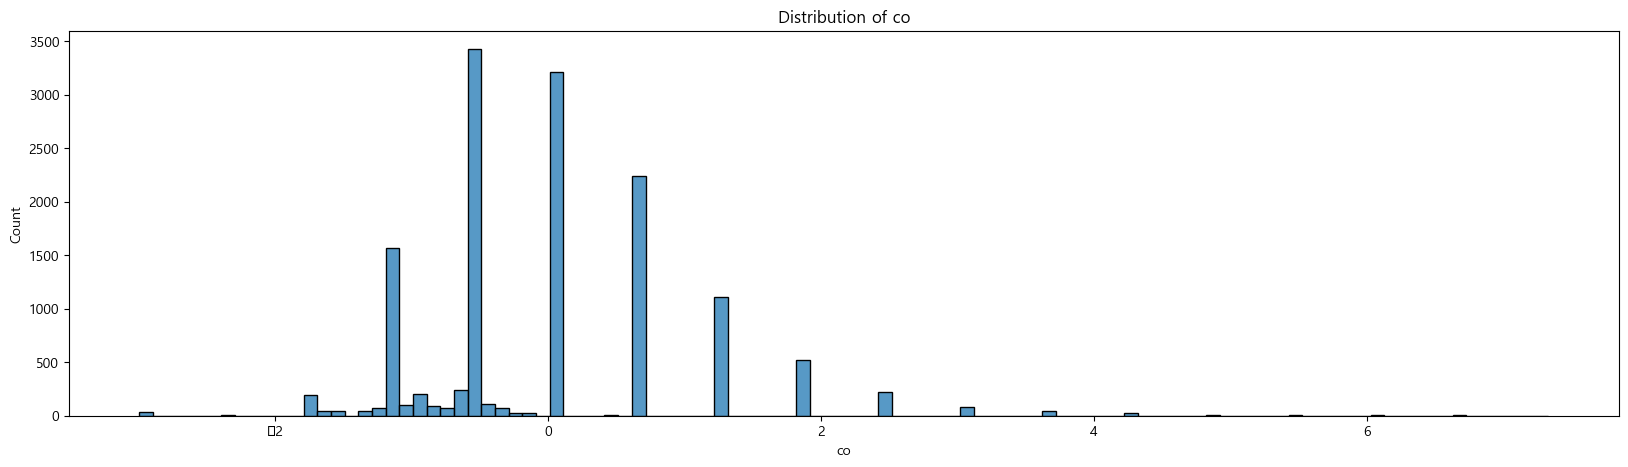

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


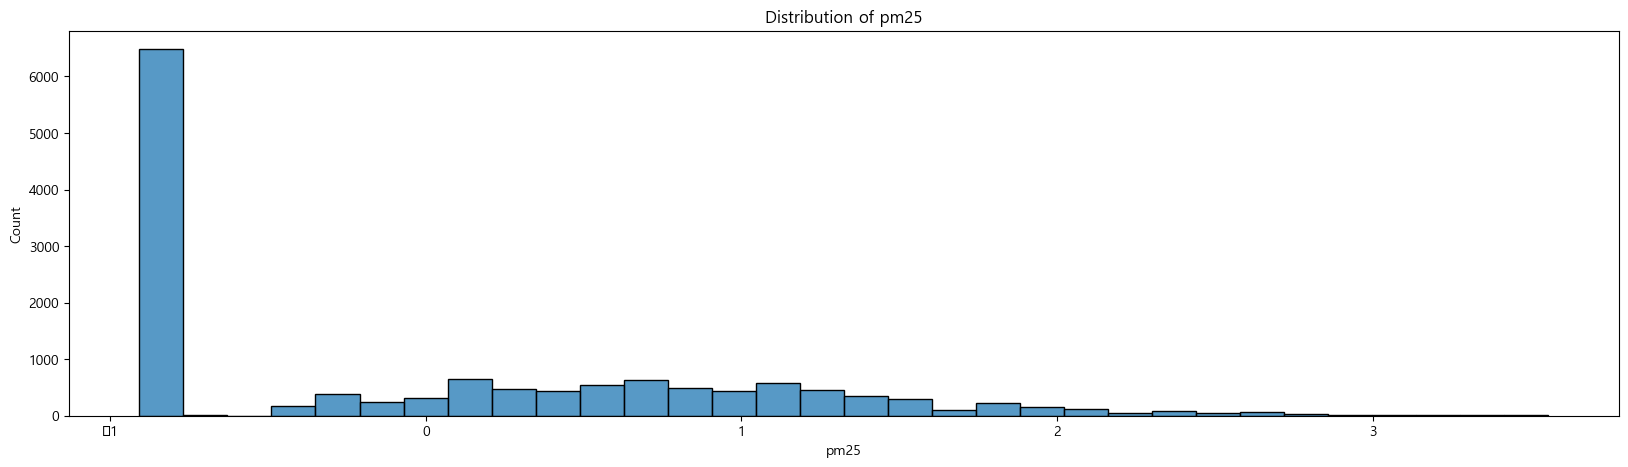

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


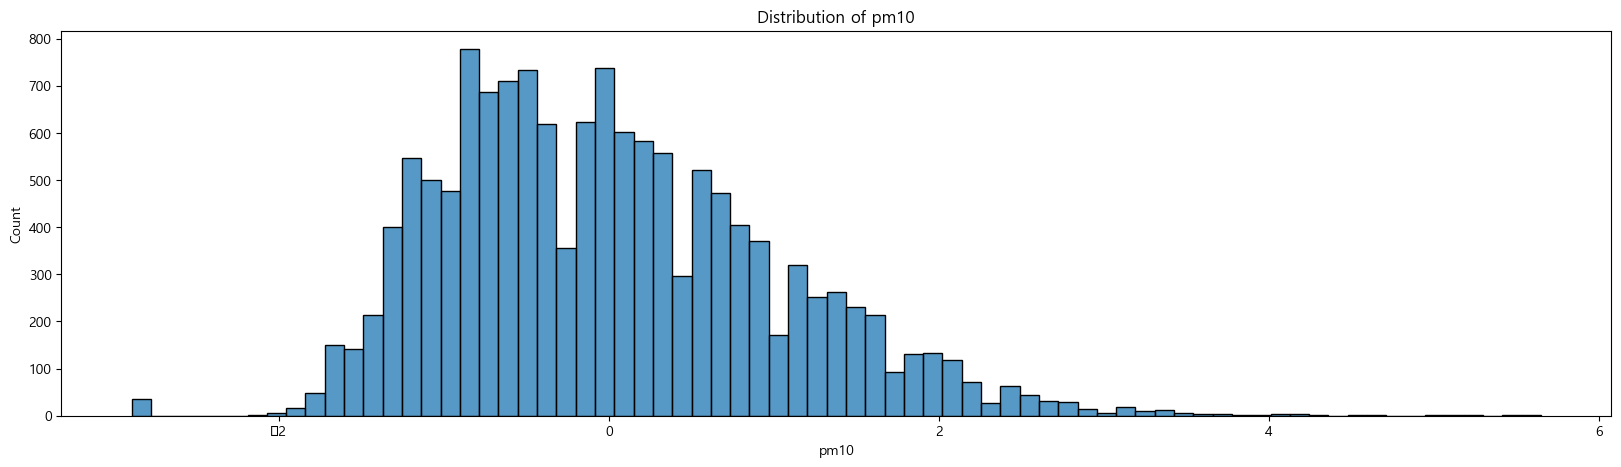

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


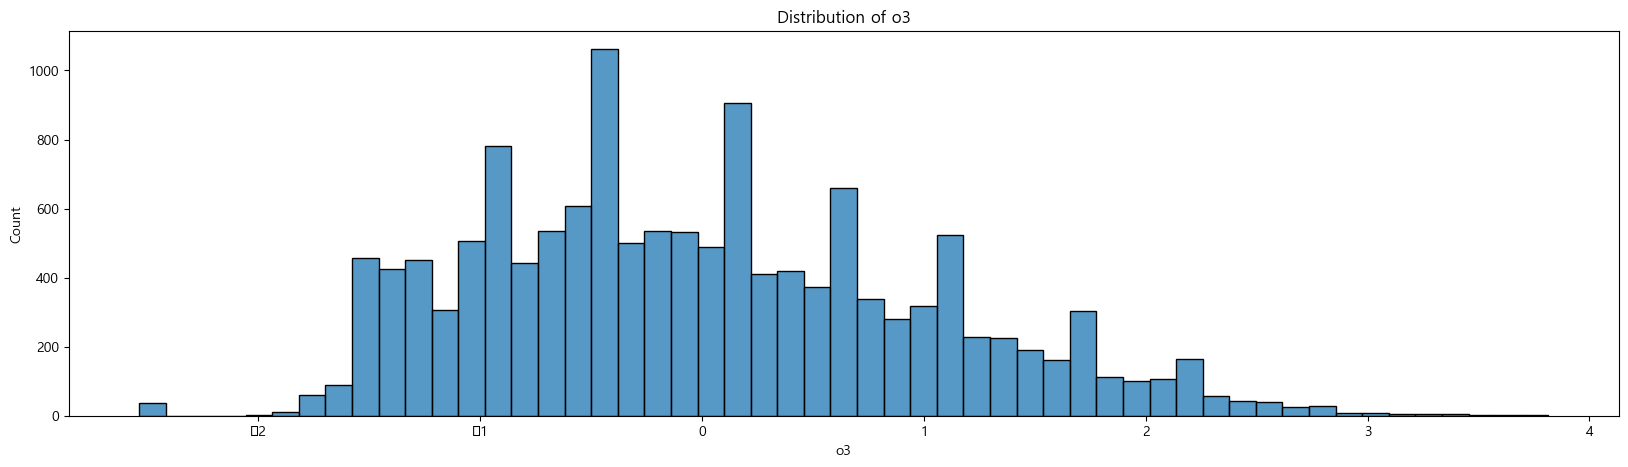

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


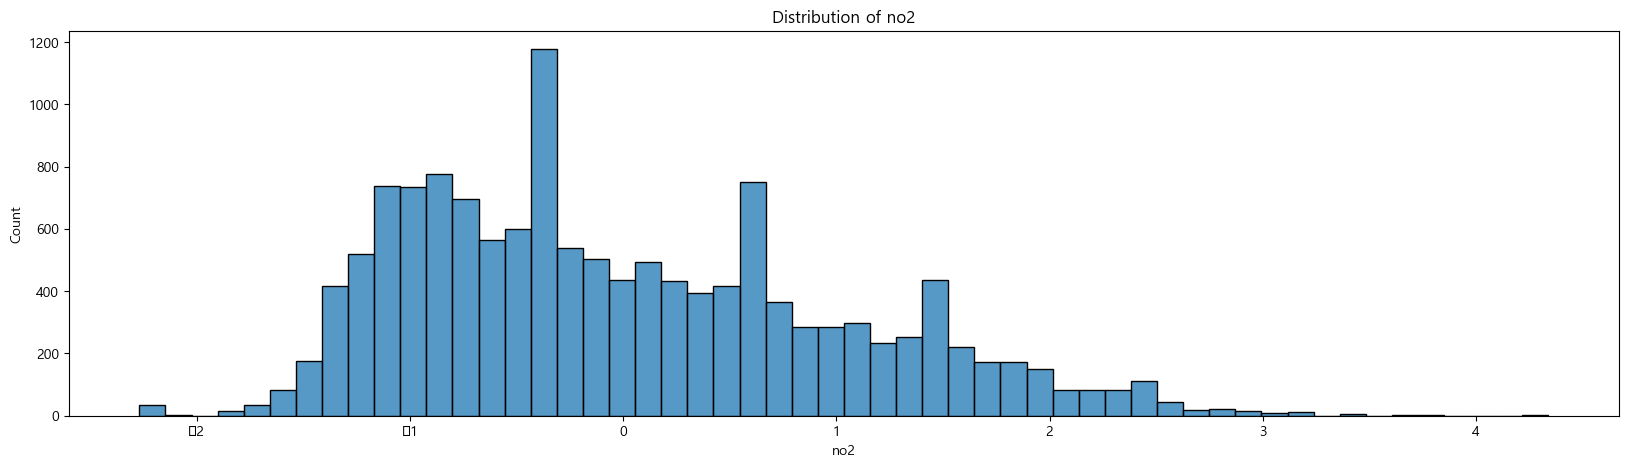

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


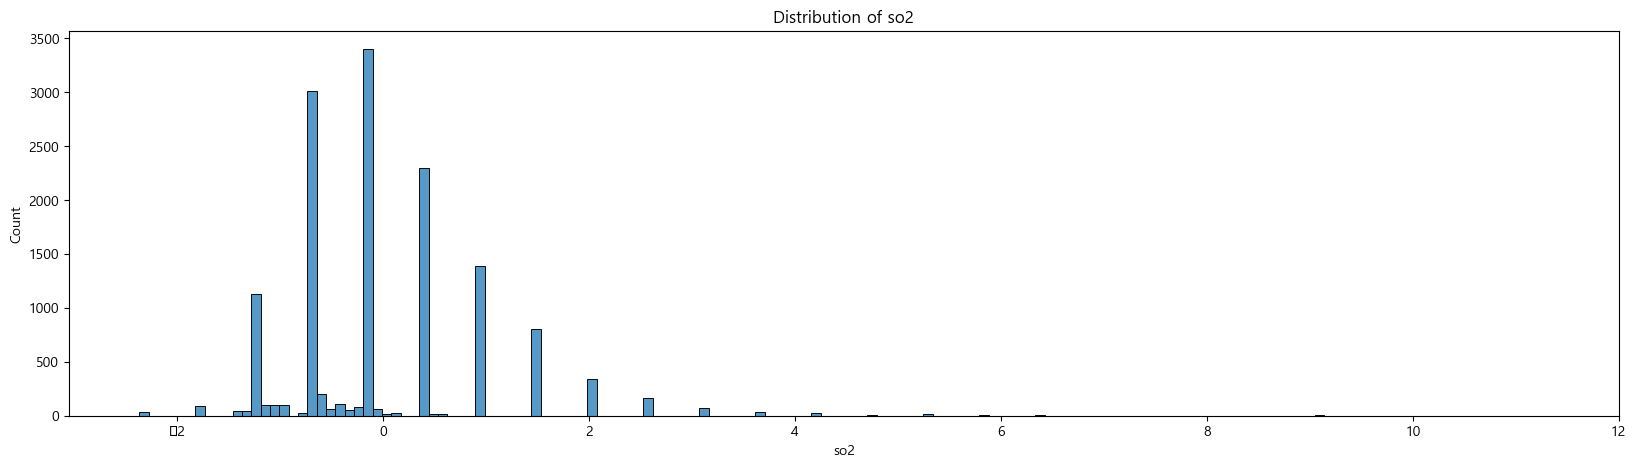

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


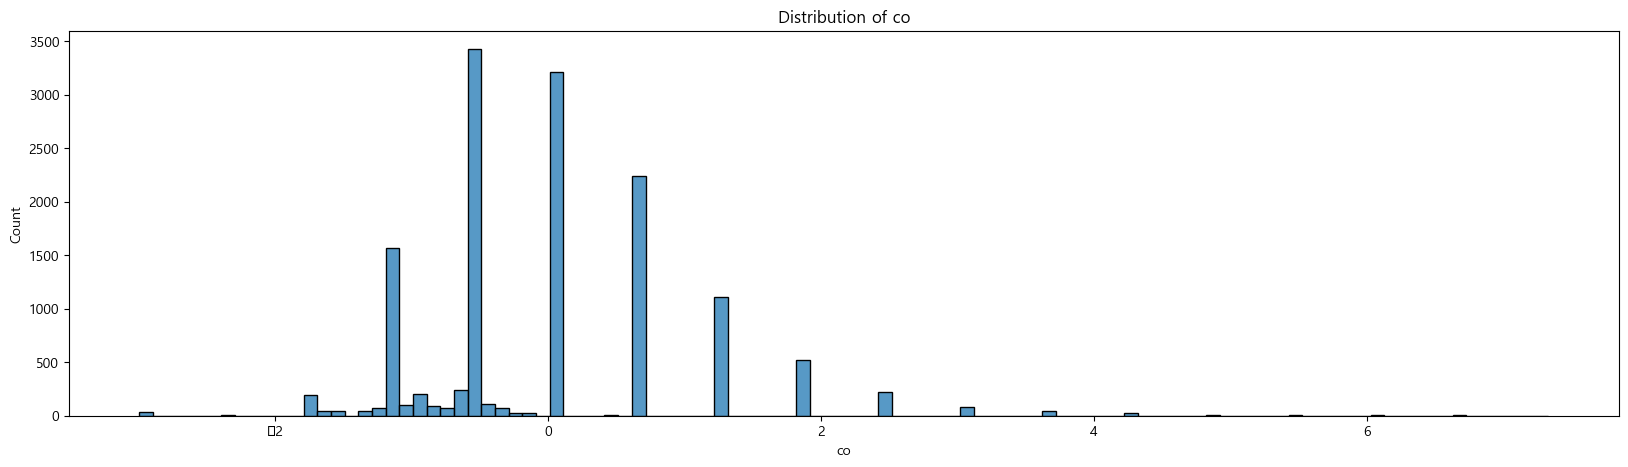

In [7]:
########## Simple Data Exploration 3: Plot-3 ##########
# showing the distribution of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.histplot(data_std[pollutant])
    plt.title(f'Distribution of {pollutant}')
    plt.show()

# Drop the rows with pm25 = 0.0
# df = df[df['pm25'] != 0.0]

# showing the distribution of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.histplot(data_std[pollutant])
    plt.title(f'Distribution of {pollutant}')
    plt.show()



========= PCA Dataframe =========
            PC1       PC2     City
0      1.088727 -0.765638       강릉
1      1.082445 -0.797946       강릉
2      0.839713 -0.220437       강릉
3      0.327154  0.007161       강릉
4     -0.842385  0.499145       강릉
5     -0.783781 -0.123579       강릉
6     -1.548981 -1.076707       강릉
7     -0.775308 -1.281437       강릉
8     -1.989053 -1.382300       강릉
9     -0.963844 -1.193438       강릉
10     0.631049 -0.444094       강릉
11     0.555147 -0.722925       강릉
12     1.020603 -0.974543       강릉
13     3.067403 -0.473621       강릉
14     1.518970  0.237018       강릉
15     0.321032  0.639983       강릉
16    -0.306158  0.213942       강릉
17    -1.643233 -0.109499       강릉
18    -1.983341 -1.303493       강릉
19    -2.263013 -1.354336       강릉
20    -1.983590 -0.977156       강릉
21    -0.852848 -0.814596       강릉
22     0.342265 -0.987773       강릉
23     0.554383 -1.192334       강릉
24     2.555950 -1.135012       강릉
25     0.866160 -1.116713       강릉
26     0.810959 -0.4

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


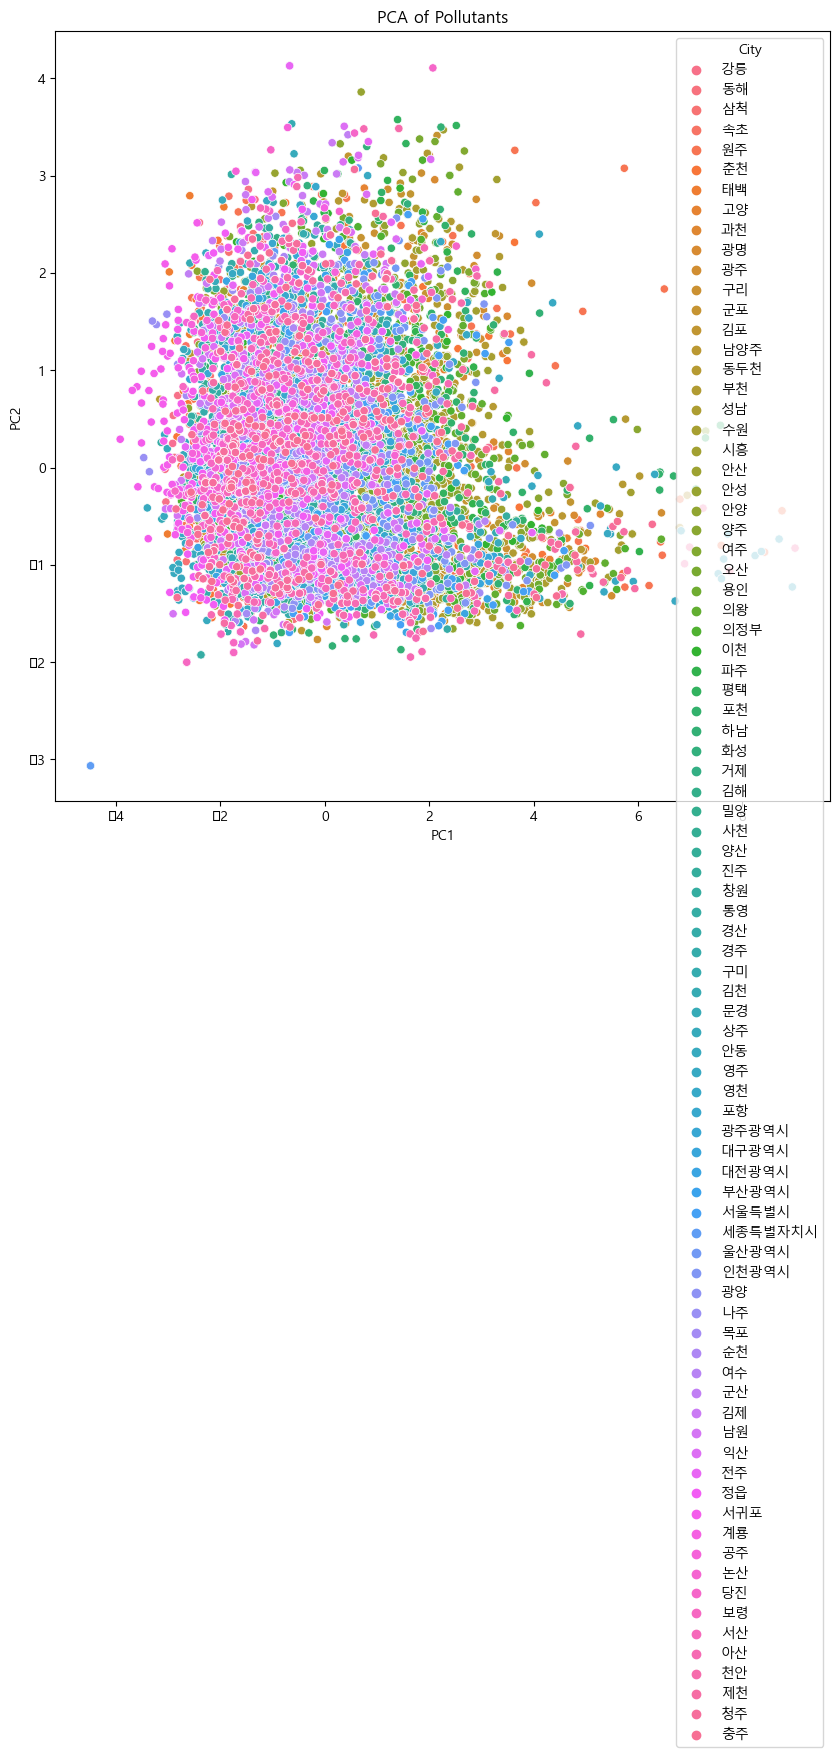

In [8]:
from sklearn.decomposition import PCA
import pandas as pd

def perform_pca(data, pollutants, num_components=2):
    # Standardize the data
    data_std = (data - data.mean()) / data.std()
    
    # Perform PCA
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(data_std[pollutants])
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    principal_df['City'] = data['City']
    
    # Combine the principal components values by City
    principal_df = principal_df.groupby('City').mean()
    
    return principal_df


# Print the principal components 
print("\n========= PCA Dataframe =========")
print(principal_df)

# Plot the principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='City', data=principal_df)
plt.title('PCA of Pollutants')
plt.show()

# # Plot the pm_df (pm25, pm10)
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='pm25', y='pm10', hue='City', data=pm_df)
# plt.title('pm25 vs pm10')
# plt.show()




========= PCA Dataframe =========
              PC1       PC2
City                       
강릉      -0.863458  0.147502
거제      -1.062399  0.189844
경산      -0.715229 -0.294642
경주      -0.544771 -0.348848
계룡      -1.705032 -0.937387
고양       0.479928  0.038454
공주      -1.835456 -0.865447
과천       0.914491 -0.222600
광명       0.990400 -0.009923
광양      -0.365862 -0.032417
광주       1.391813 -0.135685
광주광역시   -0.599496  0.103068
구리       0.502358  0.172672
구미      -0.141914  0.077199
군산      -0.285718  0.310599
군포       0.683164  0.028859
김제      -0.878587  0.121831
김천      -0.743796  0.305270
김포       0.305002  0.487052
김해      -0.761893  0.016412
나주      -1.248961 -0.370718
남양주      0.039819 -0.115789
남원      -0.737093  0.101760
논산      -1.551490 -0.889501
당진      -0.670966  0.468958
대구광역시   -0.328293  0.039331
대전광역시   -0.519448 -0.049302
동두천      0.584734  0.267278
동해      -0.652785 -0.102192
목포      -0.485441  0.102094
문경      -1.365721 -0.787806
밀양      -1.311902 -0.324976
보령      -1.72

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


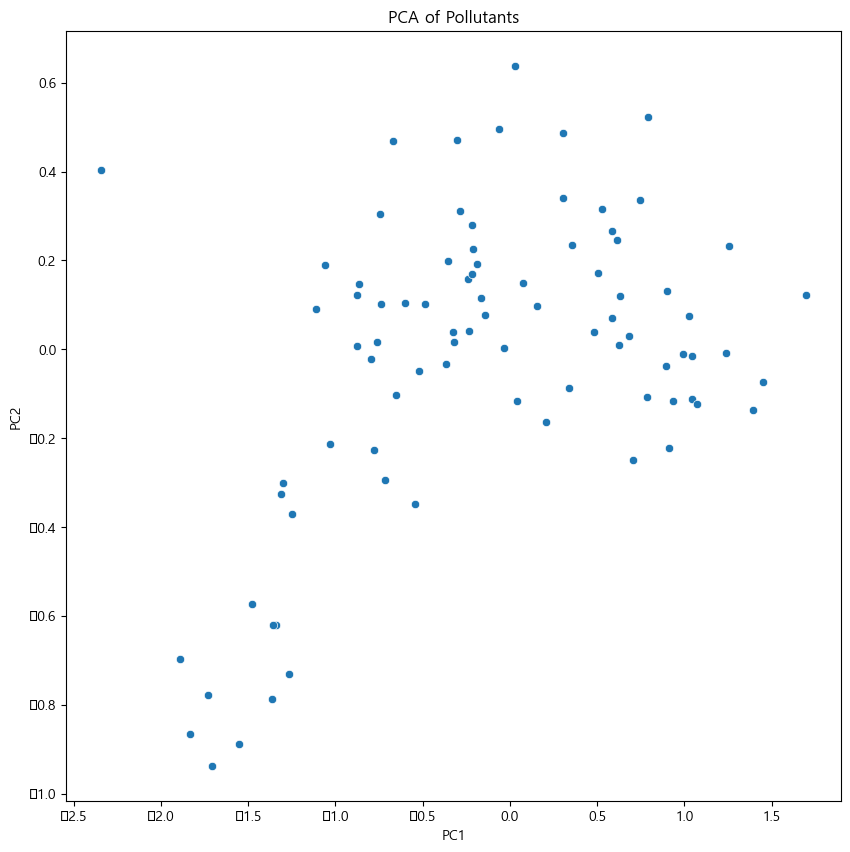

In [9]:
# combine the principal_components values by City
principal_df = principal_df.groupby('City').mean()
print("\n========= PCA Dataframe =========")
print(principal_df)

# group the pm_df by City
pm_df = pm_df.groupby('City').mean()

# Plot the principal_components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA of Pollutants')
plt.show()

# #Plot the pm_df (pm25, pm10)
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='pm25', y='pm10', hue='City', data=pm_df)
# plt.title('pm25 vs pm10')
# plt.show()

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


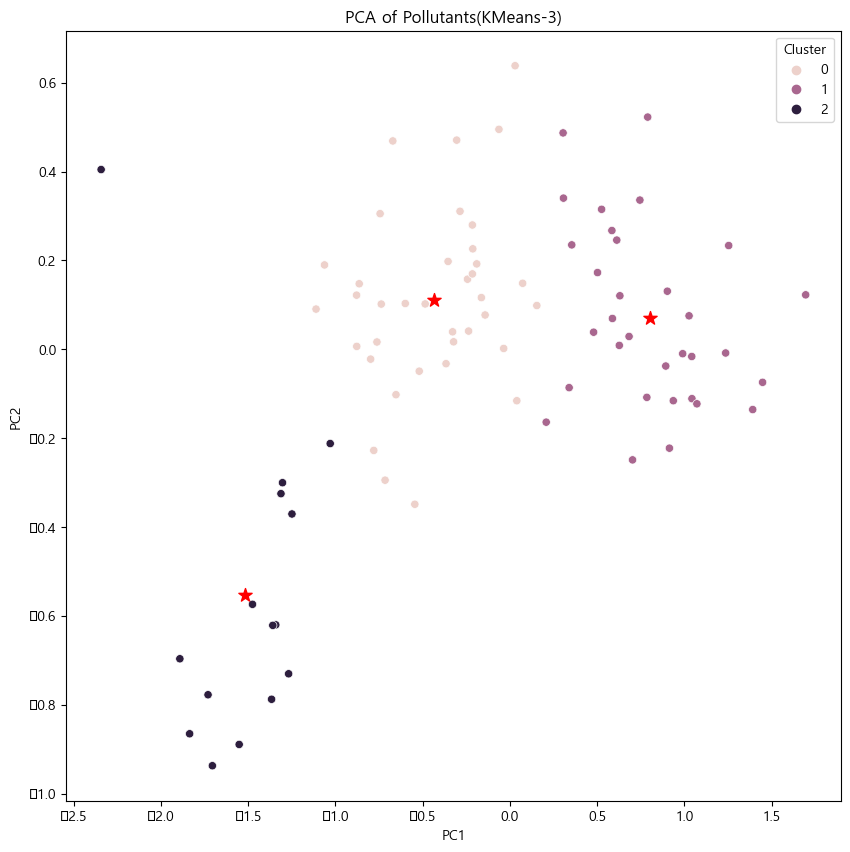


========= City and Cluster =========
              PC1       PC2  Cluster
City                                
강릉      -0.863458  0.147502        0
거제      -1.062399  0.189844        0
경산      -0.715229 -0.294642        0
경주      -0.544771 -0.348848        0
계룡      -1.705032 -0.937387        2
고양       0.479928  0.038454        1
공주      -1.835456 -0.865447        2
과천       0.914491 -0.222600        1
광명       0.990400 -0.009923        1
광양      -0.365862 -0.032417        0
광주       1.391813 -0.135685        1
광주광역시   -0.599496  0.103068        0
구리       0.502358  0.172672        1
구미      -0.141914  0.077199        0
군산      -0.285718  0.310599        0
군포       0.683164  0.028859        1
김제      -0.878587  0.121831        0
김천      -0.743796  0.305270        0
김포       0.305002  0.487052        1
김해      -0.761893  0.016412        0
나주      -1.248961 -0.370718        2
남양주      0.039819 -0.115789        0
남원      -0.737093  0.101760        0
논산      -1.551490 -0.889501        2


In [10]:
# clustering with KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def perform_kmeans_clustering(data, num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    data['Cluster'] = kmeans.labels_

    # Plot the data
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='*', c='red', label='Centroids')
    plt.title('PCA of Pollutants (KMeans-{})'.format(num_clusters))
    plt.show()



C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


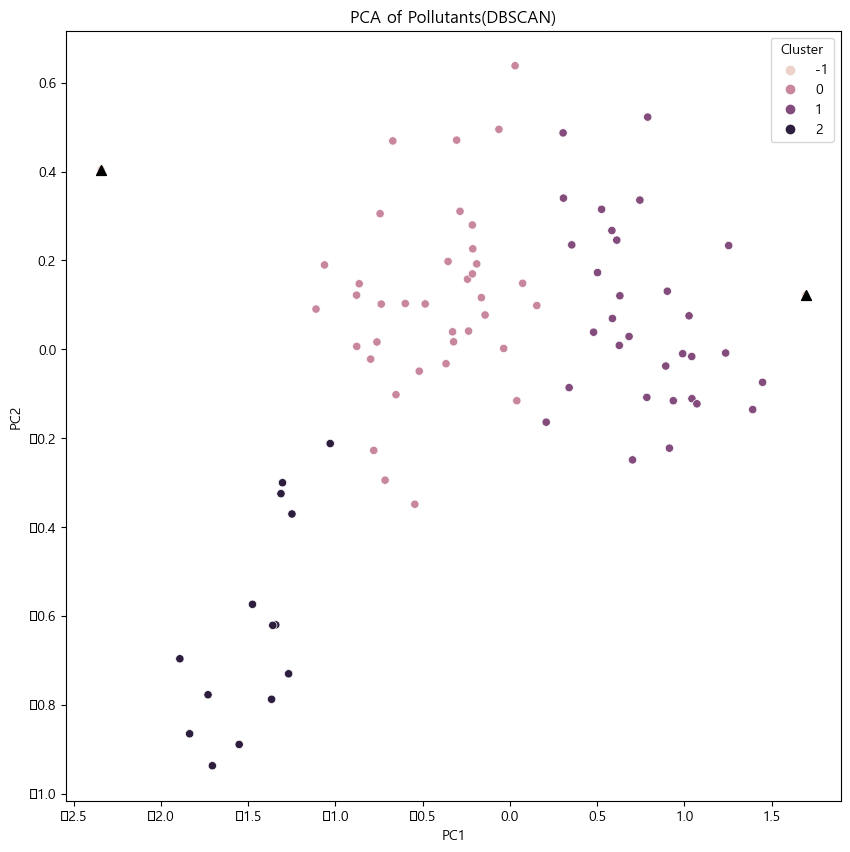


========= List of cities in each cluster =========

Cluster 0:
['강릉' '거제' '경산' '경주' '광양' '광주광역시' '구미' '군산' '김제' '김천' '김해' '남양주' '남원' '당진'
 '대구광역시' '대전광역시' '동해' '목포' '부산광역시' '삼척' '서산' '순천' '아산' '안동' '안성' '양산' '여주'
 '익산' '전주' '정읍' '진주' '창원' '청주' '춘천' '충주' '포항' '화성']

Cluster 2:
['계룡' '공주' '나주' '논산' '문경' '밀양' '보령' '사천' '상주' '세종특별자치시' '속초' '영천' '태백'
 '통영']

Cluster 1:
['고양' '과천' '광명' '광주' '구리' '군포' '김포' '동두천' '부천' '서울특별시' '성남' '수원' '안산' '안양'
 '양주' '여수' '영주' '오산' '용인' '울산광역시' '원주' '의왕' '의정부' '이천' '인천광역시' '제천' '천안'
 '파주' '평택' '포천' '하남']

Cluster -1:
['서귀포' '시흥']


In [11]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

def run_dbscan_clustering(data, eps=0.35, min_samples=6):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    data['Cluster'] = dbscan.labels_

    # Plot the data
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data)
    plt.scatter(data[data['Cluster'] == -1]['PC1'], data[data['Cluster'] == -1]['PC2'], s=50, marker='^', c='black', label='Outliers')
    plt.title('PCA of Pollutants (DBSCAN)')
    plt.show()

    # Print list of cities in each cluster
    print("\n========= List of cities in each cluster =========")
    for cluster in data['Cluster'].unique():
        print(f'\nCluster {cluster}:')
        print(data[data['Cluster'] == cluster].index.values)


Cluster 0:
이 클러스터의 도시들은 주로 수도권과 지방 도시로 구성되어 있습니다. 이 지역은 산업 밀집지역이 많아 공장 및 산업 활동으로 인한 대기 오염이 발생할 수 있습니다. 또한 도시화로 인한 토지 이용 변화와 인구 증가로 인해 폐기물 처리 문제가 발생할 수 있습니다.

Cluster 1:
이 클러스터의 도시들은 동해안과 서울 근처 지역에 위치하고 있습니다. 해안 도시들은 해양 오염에 노출되는 위험이 있을 수 있으며, 서울과 같은 주요 도시들은 교통량과 산업 활동으로 인한 대기 오염이 주요 문제일 수 있습니다.

Cluster 3:
이 클러스터의 도시들은 남부 지방과 산악 지역에 위치하고 있습니다. 이 지역은 자연 환경이 풍부하며 농업 활동이 활발합니다. 따라서 농약 사용이나 농업 폐기물 처리 등과 같은 농업 환경 오염이 주요 관심사일 수 있습니다.

Cluster 2:
이 클러스터의 도시들은 수도권 지역에 위치하고 있습니다. 수도권은 인구 밀도가 높고 교통량이 많아 대기 오염과 수질 오염 등의 환경 오염 문제가 주요 관심사일 수 있습니다.

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

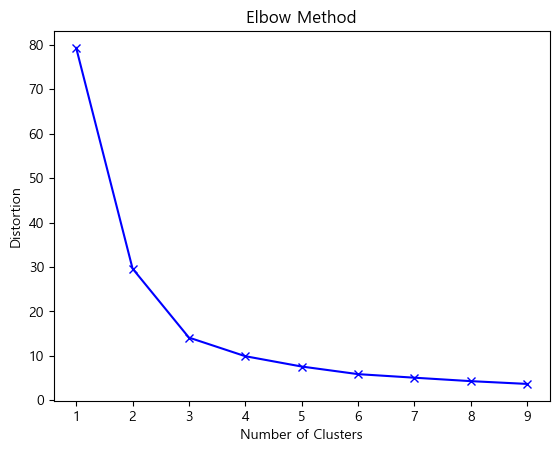

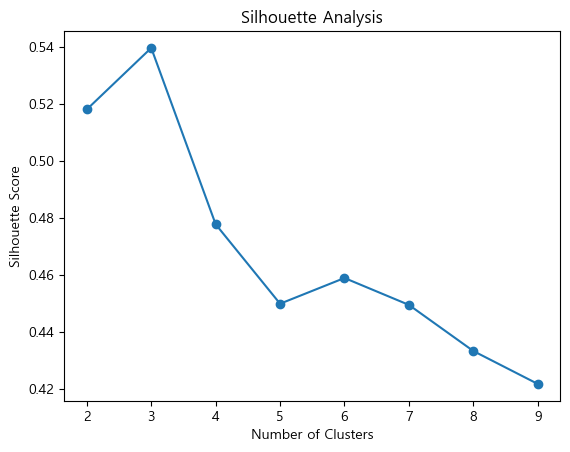

C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


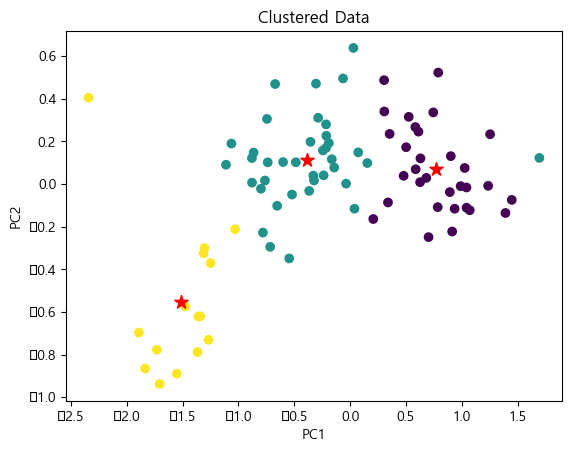

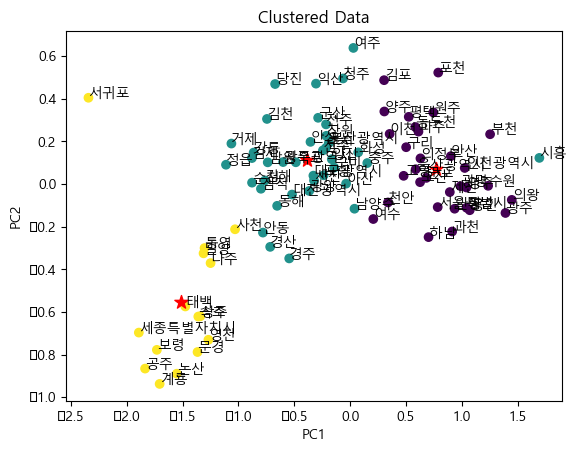


========= List of cities in each cluster =========

Cluster 1:
['강릉' '거제' '경산' '경주' '광양' '광주광역시' '구미' '군산' '김제' '김천' '김해' '남양주' '남원' '당진'
 '대구광역시' '대전광역시' '동해' '목포' '부산광역시' '삼척' '서산' '순천' '시흥' '아산' '안동' '안성' '양산'
 '여주' '익산' '전주' '정읍' '진주' '창원' '청주' '춘천' '충주' '포항' '화성']

Cluster 2:
['계룡' '공주' '나주' '논산' '문경' '밀양' '보령' '사천' '상주' '서귀포' '세종특별자치시' '속초' '영천'
 '태백' '통영']

Cluster 0:
['고양' '과천' '광명' '광주' '구리' '군포' '김포' '동두천' '부천' '서울특별시' '성남' '수원' '안산' '안양'
 '양주' '여수' '영주' '오산' '용인' '울산광역시' '원주' '의왕' '의정부' '이천' '인천광역시' '제천' '천안'
 '파주' '평택' '포천' '하남']


In [13]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def elbow_method(data):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

def silhouette_analysis(data):
    silhouette_scores = []
    J = range(2, 10)
    for j in J:
        kmeans = KMeans(n_clusters=j)
        kmeans.fit(data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    plt.plot(J, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()





# Choose the optimal number of clusters
optimal_cluster_num = 3 # 사용자가 직접 선택



# Perform K-means clustering with the optimal number of clusters
kmeans3 = KMeans(n_clusters=optimal_cluster_num)
kmeans3.fit(principal_df)
labels = kmeans3.labels_

# append the cluster labels to the principal_df
principal_df['Cluster'] = labels


# Visualize the clustered data
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, marker='*',c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Data')
plt.show()

# Visualize the clustered data with labels
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, marker='*',c='red', label='Centroids')
# label the data points
for i, txt in enumerate(principal_df.index.values):
    plt.annotate(txt, (principal_df['PC1'][i], principal_df['PC2'][i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Data')
plt.show()


# print list of cities in each cluster
print("\n========= List of cities in each cluster =========")
for cluster in principal_df['Cluster'].unique():
    print(f'\nCluster {cluster}:')
    print(principal_df[principal_df['Cluster'] == cluster].index.values)




    




Cluster 3:

이 클러스터에는 광주광역시, 인천광역시, 울산광역시 등 대도시들이 포함되어 있습니다. 이들 도시들은 산업 및 상업 중심지로서, 산업 활동과 인구 밀도가 높습니다. 따라서 공통적으로 대기 중의 산업 배출물 및 차량 배출 가스 등이 오염 요인으로 작용할 수 있습니다.
Cluster 2:

이 클러스터에는 서울특별시, 대구광역시, 부산광역시 등 대도시들이 포함되어 있습니다. 이들 도시들은 인구 밀도가 높고 교통량이 많은 특징을 가지며, 산업 및 상업 활동이 활발합니다. 따라서 차량 배출 가스, 산업 배출물, 대기 중 입자물질 등이 주요한 오염 요인으로 작용할 수 있습니다.
Cluster 1:

이 클러스터에는 경산, 고양, 광주, 성남, 수원 등 도시들이 포함되어 있습니다. 이들 도시들은 인접한 도심 지역이나 도시 근교에 위치하며, 인구 밀도가 높습니다. 따라서 교통량, 도심 지역의 산업 및 상업 활동으로 인한 대기 오염이 공통적인 요인일 수 있습니다.
Cluster 5:

이 클러스터에는 대전광역시, 부산광역시, 경주 등 도시들이 포함되어 있습니다. 이들 도시들은 상대적으로 자연 환경이 풍부한 특징을 가지며, 주변에 산악 지역이 많습니다. 따라서 자연적인 요인으로 인한 오염, 예를 들어 산불, 자연 발생 미세먼지 등이 공통적인 요인일 수 있습니다.
Cluster 4:

이 클러스터에는 광양, 순천, 안산, 춘천 등 도시들이 포함되어 있습니다. 이들 도시들은 산업 및 농업 활동이 활발한 특징을 가지고 있습니다. 따라서 산업 배출물, 농약 사용, 가축 사육 등이 주요한 오염 요인으로 작용할 수 있습니다.
Cluster 0:

이 클러스터에는 광명, 성남, 수원 등 도시들이 포함되어 있습니다. 이들 도시들은 수도권 지역에 위치하며, 인구 밀도가 높고 산업 및 상업 활동이 활발합니다. 따라서 도심 지역의 산업 배출물, 교통량 등이 오염 요인으로 작용할 수 있습니다.